In [1]:
import numpy as np
import pandas as pd
from scipy.stats import binom, beta
import scipy as scs 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#import pymc3 as pm

In [5]:
# We have a data set of size:
N = 100

# Success rates (=sufficient stat.)
p1, p2 = 0.49, 0.66
true_lift = p2/p1

N1 = p1*N               # number of hits in sample 1
N2 = p2*N                 # number of hits in sample 2

N1
N-N1                # number of failures

#data = binom.rvs(n, p, size=1000)
#np.mean(data)


51.0

In [6]:
#with pm.Model() as model:
#    theta = pm.Beta('theta', alpha=1, beta=1)
#    p = pm.Binomial('y', p=theta, observed=x, n=100)
#    trace = pm.sample(1000, tune=2000, target_accept=0.95)

In [24]:
# Prior1:
a0, b0 = 1, 1
MC = 1000                           #number of random samples to draw from posterior

r0post = beta.rvs(a0+N1, b0+N-N1,size = MC)
r0post.shape

m0 = (a0+N1)/(a0+b0+N)      # posterior mean

# Prior2:
a1, b1 = 1, 1
r1post = beta.rvs(a1+N2, b1+N-N2,size = MC)
r1post[:20]

m1 = (a1+N2)/(a1+b1+N)     # posterior mean

print("Mean 1", np.round(m0,4), "\nMean 2", np.round(m1,4))


Mean 1 0.4902 
Mean 2 0.6569


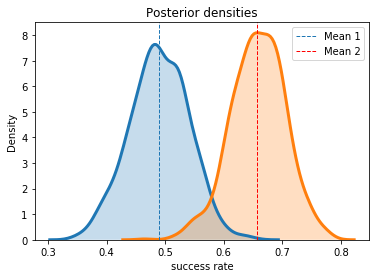

In [20]:
sns.distplot(r0post, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(r1post, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

# Plot formatting
plt.title('Posterior densities')
plt.xlabel('success rate')
plt.ylabel('Density')
plt.axvline(x=m0, linewidth=1, linestyle='--')
plt.axvline(x=m1, linewidth=1, color='r', linestyle='--')
plt.legend(['Mean 1','Mean 2'])


C:\Users\Alexander\Anaconda3\envs\MyEnv\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
C:\Users\Alexander\Anaconda3\envs\MyEnv\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


Text(0, 0.5, 'success rate 2')

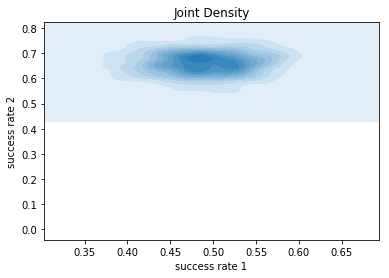

In [9]:
r = np.vstack([r0post, r1post]).T
r.shape

sns.distplot(r, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

# Plot formatting
plt.title('Joint Density')
plt.xlabel('success rate 1')
plt.ylabel('success rate 2')

Construct functions of the posterior sampled parameters:

In [10]:
delta = r1post-r0post                         # theta1 - theta2

lift = r1post/r0post

rel_delta = delta/r0post

log_odds = np.log(r1post/r0post)


In [11]:
q = pd.Series(lift).quantile([.025,.25, .5, .75,.975])
q

0.025    1.062525
0.250    1.233142
0.500    1.344325
0.750    1.468318
0.975    1.750250
dtype: float64

Text(0, 0.5, 'Density')

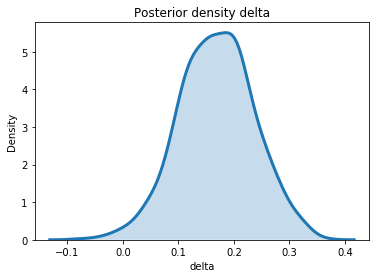

In [12]:
sns.distplot(delta, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

# Plot formatting
plt.title('Posterior density delta')
plt.xlabel('delta')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

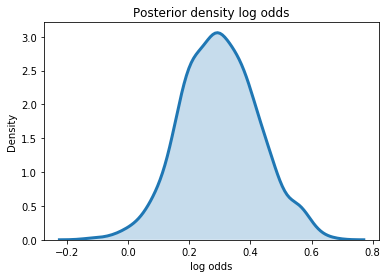

In [13]:
sns.distplot(log_odds, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

# Plot formatting
plt.title('Posterior density log odds')
plt.xlabel('log odds')
plt.ylabel('Density')

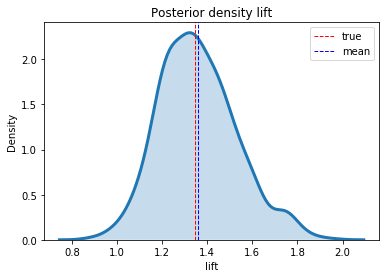

In [18]:
sns.distplot(lift, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

# Plot formatting
plt.title('Posterior density lift')
plt.xlabel('lift')
plt.ylabel('Density')
plt.axvline(x=true_lift, linewidth=1, color='r', linestyle='--')
plt.axvline(x=np.mean(lift), linewidth=1, color='b', linestyle='--')
plt.legend(['true','mean'])


In [44]:
np.mean(r1post > r0post)

#pd.DataFrame([r0post, r1post]).T

0.98899999999999999

In [49]:
x = np.linspace(0, 1, 100)
y = beta.pdf(x, a0,b0)       # prior
y = beta.pdf(x, a0+N1,b0+N-N1)       # prior

Text(0, 0.5, 'Density')

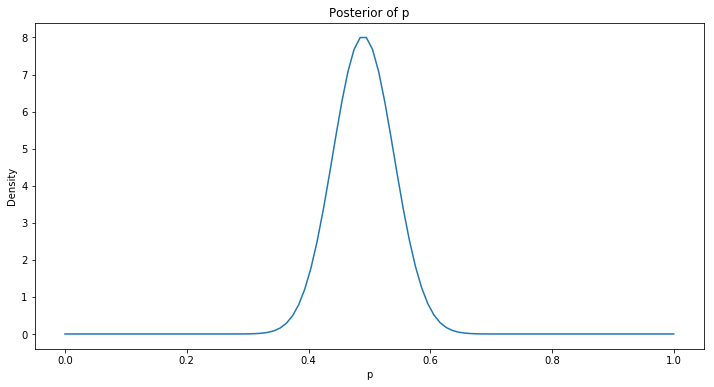

In [71]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x, y)
plt.title('Posterior of p')
plt.xlabel('p')
plt.ylabel('Density')
#plt.axvline(x=0.22058956)

In [22]:
from scipy.stats import norm, t
from math import inf

def pnorm(x, mu=0, sd=1):
   return norm.cdf(x, loc=mu, scale=sd)

In [30]:
## Approximate cdf of univariate normal via importance sampling:
##---------------------------------------------------------------
M = 10**5
dof = 3

props = t.rvs(df = dof, size=M)  #draw form student proposal

dens0 = norm.pdf(props, loc=0, scale=1)
dens1 = t.pdf(props, df = dof, loc=0, scale=1)
weigh = dens0/dens1 

a = -inf; b = inf
#a = -1 ; b = 5
np.mean(weigh*(props<=b)*(props>=a))

0.8409090612466711

In [31]:
pnorm(b) - pnorm(a)             #check

0.841344459416971